<a href="https://colab.research.google.com/github/abhaskumarsinha/Corpus2GPT/blob/main/guides/scaling_reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing Scaling Laws with Corpus2GPT
- **Name**: ABHAS KUMAR SINHA
- **Date Created**: 12-02-2024
- **Date Modified**: N/A
- **Description**: The following Corpus2GPT optimal parameter estimation for scaling is being demonstrated here using the equations in Chinchilla paper.
$$L(N, D) = \hat E + \dfrac{1}{N^\alpha} + \dfrac{1}{D^\beta}$$

# Installing and importing important libraries
- Keras
- Corpus2GPT
- Adding utilities `copy_file_to_drive('filename')` and `copy_file_from_drive('filename')`

In [ ]:
!pip install git+https://www.github.com/keras-team/keras -q
!git clone https://www.github.com/abhaskumarsinha/Corpus2GPT.git
%cd Corpus2GPT

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 6.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.
Cloning into 'Corpus2GPT'...
remote: Enumerating objects: 612, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 612 (delta 23), reused 2 (delta 2), pack-reused 565
Receiving objects: 100% (612/612), 987.79 KiB | 9.78 MiB/s, done.
Resolving deltas: 100% (321/321), done.
/content/Corpus2GPT


In [ ]:
import keras
import numpy as np
from models.GPT import build_GPT
from tokenizer.tokenizer import *
from inference.inference import *
from inference.scale_utils import *

In [ ]:
def copy_file_to_drive(file_name):
    import shutil
    try:
        source_path = f"/content/Corpus2GPT/{file_name}"
        destination_folder = '/content/drive/MyDrive/Corpus2GPT_LLMs/AEON Essays'
        destination_path = f"{destination_folder}/{file_name}"
        shutil.copy(source_path, destination_path)
        print(f"File '{file_name}' copied successfully to '{destination_folder}'.")
    except Exception as e:
        print(f"Error: {e}")

def copy_file_from_drive(file_name):
    import shutil
    try:
        source_folder = '/content/drive/MyDrive/Corpus2GPT_LLMs/AEON Essays'
        source_path = f"{source_folder}/{file_name}"
        destination_folder = '/content/Corpus2GPT/'
        destination_path = f"{destination_folder}/{file_name}"
        shutil.copy(source_path, destination_path)
        print(f"File '{file_name}' copied successfully from '{source_folder}' to '{destination_folder}'.")
    except Exception as e:
        print(f"Error: {e}")


# Setting up Models and tokenizers

In [ ]:
copy_file_from_drive('modified_essays.txt')
copy_file_from_drive('tokenizer_.model')
copy_file_from_drive('tokenizer_.vocab')

File 'modified_essays.txt' copied successfully from '/content/drive/MyDrive/Corpus2GPT_LLMs/AEON Essays' to '/content/Corpus2GPT/'.
File 'tokenizer_.model' copied successfully from '/content/drive/MyDrive/Corpus2GPT_LLMs/AEON Essays' to '/content/Corpus2GPT/'.
File 'tokenizer_.vocab' copied successfully from '/content/drive/MyDrive/Corpus2GPT_LLMs/AEON Essays' to '/content/Corpus2GPT/'.


In [ ]:
tokenizer = SPM_Tokenizer(vocab_model_file='./tokenizer_.model', input_size=256+1)

Success!


In [ ]:
dataset = tokenizer.load_dataset(['./modified_essays.txt'])

In [ ]:
for X, Y in dataset:
    X = np.array(X)
    Y = np.array(Y)

In [ ]:
vocab_size = 454+1
input_len = 256

model_configs =  [
    (input_len, vocab_size, 100, 1, 0, 10, 10, 1),
    (input_len, vocab_size, 200, 2, 0, 10, 20, 1),
    (input_len, vocab_size, 300, 1, 0, 30, 10, 1),
    (input_len, vocab_size, 400, 1, 0, 10, 40, 1),
]

model_epochs = estimate_optimal_ratios_from_models(model_configs, [1000, 2500, 5000], X[:5000], Y[:5000], 30, 128)

Total Number of Experiments: 12
Train Number: 1
Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 519ms/step - loss: 5.9454
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - loss: 5.0349
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 4.6173
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.3638
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 4.1877
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.0604
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.9689
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 3.8999
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3.8552
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 3.8032
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.7716
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.7393
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - loss: 3.7157
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.6930
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69m

In [ ]:
flops = model_epochs[0]
loss_curve = model_epochs[1]
params = model_epochs[2]

flops_c = normalize_list(flops)

Text(0, 0.5, 'Sparse Crossentropy Loss (with Logits)')

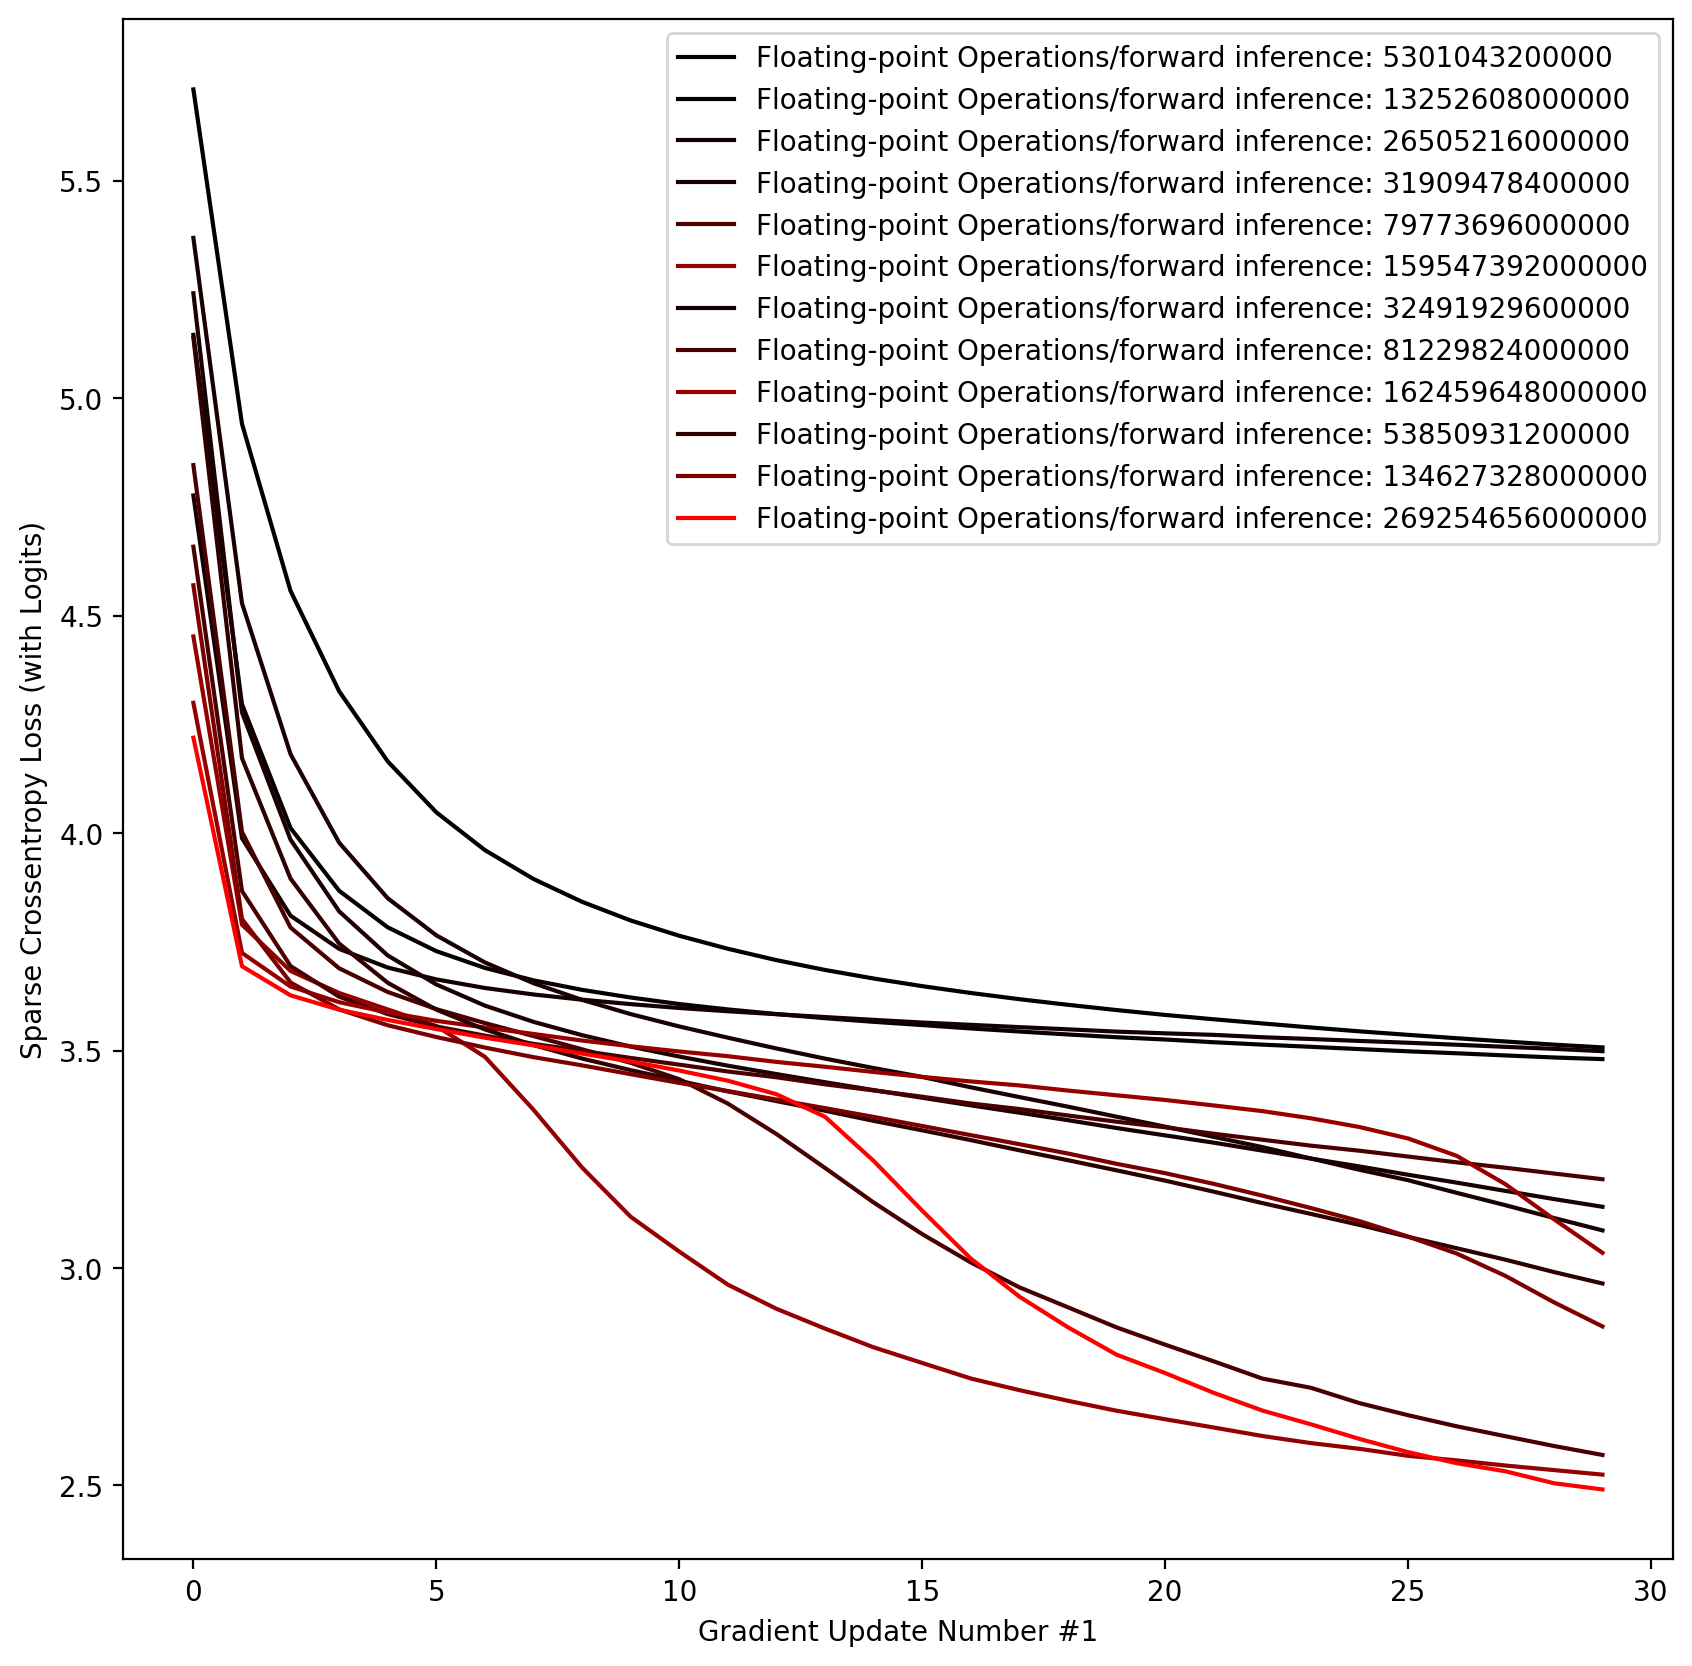

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10), dpi=200)
for i in range(12):
    plt.plot(loss_curve[i], c=[flops_c[i], 0, 0], label=f'Floating-point Operations/forward inference: {flops[i]}' )
plt.legend()
plt.xlabel('Gradient Update Number #1')
plt.ylabel('Sparse Crossentropy Loss (with Logits)')

In [ ]:
import pandas as pd

# Example arrays
array_n = flops
array_nxn = loss_curve
array_x = params

# Create DataFrame
df = pd.DataFrame({
    'Floating Point Operations (Total)': array_n,
    'The loss curve (total Epochs = 30)': [array_nxn[i] for i in range(len(array_nxn))],
    'Total Model Parameters': array_x
})

# Save DataFrame to CSV file
df.to_csv('scaling_report.csv', index=False)


In [ ]:
df

,Floating Point Operations (Total),The loss curve (total Epochs = 30),Total Model Parameters
0,5301043200000,"[5.710371971130371, 4.941410064697266, 4.55696...",178156
1,13252608000000,"[5.145852088928223, 4.296669960021973, 4.01161...",178156
2,26505216000000,"[4.776500225067139, 3.988417148590088, 3.81012...",178156
3,31909478400000,"[5.368901252746582, 4.5289483070373535, 4.1815...",717856
4,79773696000000,"[4.846287250518799, 4.003006458282471, 3.78287...",717856
5,159547392000000,"[4.452358245849609, 3.7895123958587646, 3.6831...",717856
6,32491929600000,"[5.241590976715088, 4.277544021606445, 3.98493...",893556
7,81229824000000,"[4.658764839172363, 3.8669917583465576, 3.6942...",893556
8,162459648000000,"[4.29961633682251, 3.724559783935547, 3.647194...",893556
9,53850931200000,"[5.138901233673096, 4.1724677085876465, 3.8953...",1431256
